# EiLA Data Analysis: create charts used in the reports. 

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import ast
import matplotlib.pyplot as plt
import csv
import os
import cv2

In [43]:
# Load the data
demographicsData = pd.read_csv('./Extra/demographics.csv',header=None)
demographicsData.columns = ['video_tag','clip_id','person_id','person_global_id','race','gender','skin_color']

#data folder
# datafolder = '/ExtractedData/'

In [16]:
datafolder = './EiLA_data/'

In [44]:
demographicsData

,video_tag,clip_id,person_id,person_global_id,race,gender,skin_color
0,aJKL0ahn1Dk,1,0,0,W,F,#e4a9ad
1,aJKL0ahn1Dk,2,4,0,W,F,#c88a92
2,UpFG5ZK62XM,2,4,0,W,F,#be866f
3,UpFG5ZK62XM,3,3,0,W,F,#c5917c
4,UpFG5ZK62XM,4,4,0,W,F,#cb9185
...,...,...,...,...,...,...,...
168,UpFG5ZK62XM,3,1,8,W,M,#c07f76
169,UpFG5ZK62XM,4,2,8,W,M,#e6968b
170,ngITkMvWuq8,1,1,9,W,M,#d29497
171,ngITkMvWuq8,2,3,9,W,M,#e29290


In [5]:
# plot the distribution of gender in demographics data
genderCount= demographicsData['gender'].value_counts()

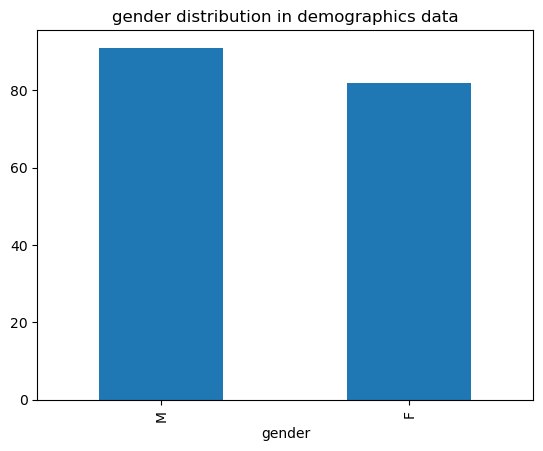

In [6]:
genderCount.plot(kind='bar')
plt.title('gender distribution in demographics data')
plt.show()

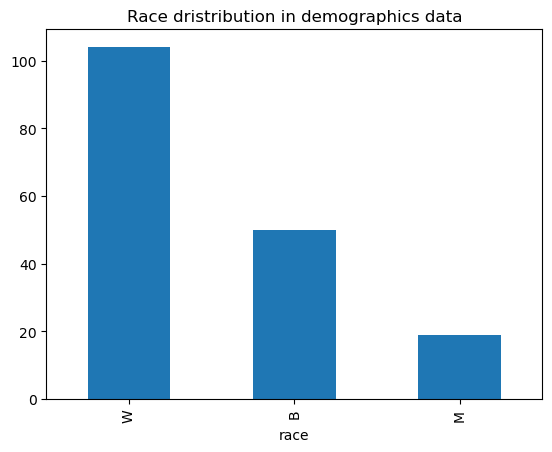

In [7]:
#plot the distribution of race;
raceCount = demographicsData['race'].value_counts()
raceCount.plot(kind='bar')
plt.title('Race dristribution in demographics data')
plt.show()

In [21]:
#Store files for each emotion

typeEmotions=['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger']

dataset={}
# base_path = 'Users/poojakishore/Downloads/CapitaSelectaData' + datafolder
for (idx,emotion) in zip(range(7),typeEmotions):
    folder_path = f'{datafolder}{idx}'
    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    print(files)
    dataset[emotion]=files

['ngITkMvWuq8_3_6_21067_21097.jpg', 'Ul53TVUR4NM_2_6_4933_4957.jpg', 'Ul53TVUR4NM_8_3_34715_34721.jpg', 'ngITkMvWuq8_2_1_20173_20269.jpg', 'Ul53TVUR4NM_10_0_63715_63745.jpg', 'Uh00UIl7-bo_1_8_16249_16291.jpg', 'Uh00UIl7-bo_1_0_8953_8989.jpg', 'Uh00UIl7-bo_1_8_16249_16285.jpg', 'Uh00UIl7-bo_1_2_12151_12223.jpg', 'Ul53TVUR4NM_6_0_19824_19836.jpg', 'Ul53TVUR4NM_3_1_11677_11725.jpg', 'Ul53TVUR4NM_8_5_34757_34781.jpg', 'Uh00UIl7-bo_1_12_14677_14701.jpg', 'Ul53TVUR4NM_3_1_11677_11731.jpg', 'Ul53TVUR4NM_3_1_11677_11719.jpg', 'uLpLviZ4Hc4_2_1_6385_6391.jpg', 'Uh00UIl7-bo_1_4_7795_7813.jpg', 'Ul53TVUR4NM_7_9_24509_24575.jpg', 'Uh00UIl7-bo_1_4_7795_7807.jpg', 'Zwf-fZdgtYA_1_5_4327_4369.jpg', 'Uh00UIl7-bo_1_2_11683_11785.jpg', 'uLpLviZ4Hc4_2_1_6385_6385.jpg', 'Ul53TVUR4NM_2_1_4831_4987.jpg', 'Uh00UIl7-bo_1_2_8077_8245 2.jpg', 'Ul53TVUR4NM_2_1_4831_4993.jpg', 'Uh00UIl7-bo_1_0_9895_9931.jpg', 'Uh00UIl7-bo_1_0_9895_9919.jpg', 'Uh00UIl7-bo_1_9_13933_13969.jpg', 'Ul53TVUR4NM_5_5_15846_15888.jpg', 'Ul5

In [22]:
dataset

{'Neutral': ['ngITkMvWuq8_3_6_21067_21097.jpg',
  'Ul53TVUR4NM_2_6_4933_4957.jpg',
  'Ul53TVUR4NM_8_3_34715_34721.jpg',
  'ngITkMvWuq8_2_1_20173_20269.jpg',
  'Ul53TVUR4NM_10_0_63715_63745.jpg',
  'Uh00UIl7-bo_1_8_16249_16291.jpg',
  'Uh00UIl7-bo_1_0_8953_8989.jpg',
  'Uh00UIl7-bo_1_8_16249_16285.jpg',
  'Uh00UIl7-bo_1_2_12151_12223.jpg',
  'Ul53TVUR4NM_6_0_19824_19836.jpg',
  'Ul53TVUR4NM_3_1_11677_11725.jpg',
  'Ul53TVUR4NM_8_5_34757_34781.jpg',
  'Uh00UIl7-bo_1_12_14677_14701.jpg',
  'Ul53TVUR4NM_3_1_11677_11731.jpg',
  'Ul53TVUR4NM_3_1_11677_11719.jpg',
  'uLpLviZ4Hc4_2_1_6385_6391.jpg',
  'Uh00UIl7-bo_1_4_7795_7813.jpg',
  'Ul53TVUR4NM_7_9_24509_24575.jpg',
  'Uh00UIl7-bo_1_4_7795_7807.jpg',
  'Zwf-fZdgtYA_1_5_4327_4369.jpg',
  'Uh00UIl7-bo_1_2_11683_11785.jpg',
  'uLpLviZ4Hc4_2_1_6385_6385.jpg',
  'Ul53TVUR4NM_2_1_4831_4987.jpg',
  'Uh00UIl7-bo_1_2_8077_8245 2.jpg',
  'Ul53TVUR4NM_2_1_4831_4993.jpg',
  'Uh00UIl7-bo_1_0_9895_9931.jpg',
  'Uh00UIl7-bo_1_0_9895_9919.jpg',
  'Uh00UIl

In [23]:
dataset.keys()

dict_keys(['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger'])

In [24]:
#get distribution of emotions count
emotionCount = {}
for emotion in dataset.keys():
    emotionCount[emotion] = len(dataset[emotion])
    
emotionCount


{'Neutral': 2459,
 'Happy': 1520,
 'Sad': 182,
 'Surprise': 189,
 'Fear': 223,
 'Disgust': 170,
 'Anger': 920}

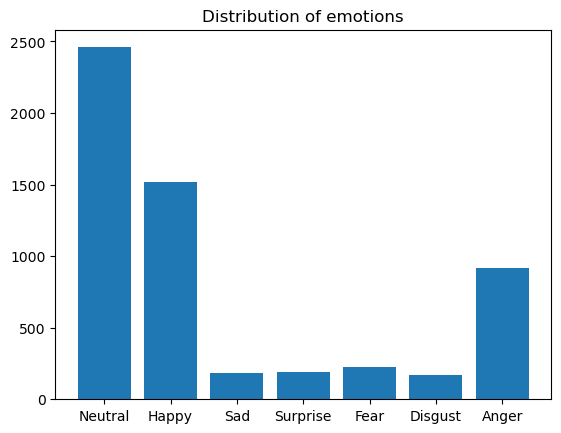

In [25]:
#plot the distribution of emotions
plt.bar(emotionCount.keys(),emotionCount.values())
plt.title('Distribution of emotions')
plt.show()


In [13]:
#get file name, clip_id, person_id and frame from the file names
def parse_filename(file):
    # Split the file name from its extension
    filename, ext = os.path.splitext(file)

    # Split the filename by underscores to extract parts
    parts = filename.split('_')

    if len(parts) >= 4:
        # Handle cases where the first part contains underscores
        name = '_'.join(parts[:-3])
        clip_id = parts[-3]
        person_id = parts[-2]
        frame_id = parts[-1]

        return name, clip_id, person_id, frame_id
    else:
        raise ValueError("Filename format is not as expected")

In [14]:
genderDistribution={}
for emotion in dataset.keys():
    m = 0
    f = 0
    for file in dataset[emotion]:
        try:
            video_name, clip_id, person_id, frame_id = parse_filename(file)

            # Filter demographicsData for matching video_name, clip_id, and person_id
            match = demographicsData[
                (demographicsData['video_tag'] == video_name) &
                (demographicsData['clip_id'] == int(clip_id)) &
                (demographicsData['person_id'] == int(person_id))
                ]

            if not match.empty:
                gender = match['gender'].values[0]
                if gender == 'M':
                    m += 1
                elif gender == 'F':
                    f += 1
        except ValueError as e:
            print(f"Error parsing file {file}: {e}")

    genderCount = {'M': m, 'F': f}
    genderDistribution[emotion] = genderCount

In [15]:
genderDistribution

{'Anger': {'M': 13, 'F': 12},
 'Disgust': {'M': 10, 'F': 6},
 'Fear': {'M': 10, 'F': 5},
 'Happy': {'M': 39, 'F': 45},
 'Sad': {'M': 11, 'F': 7},
 'Surprise': {'M': 9, 'F': 10},
 'Neutral': {'M': 56, 'F': 45}}

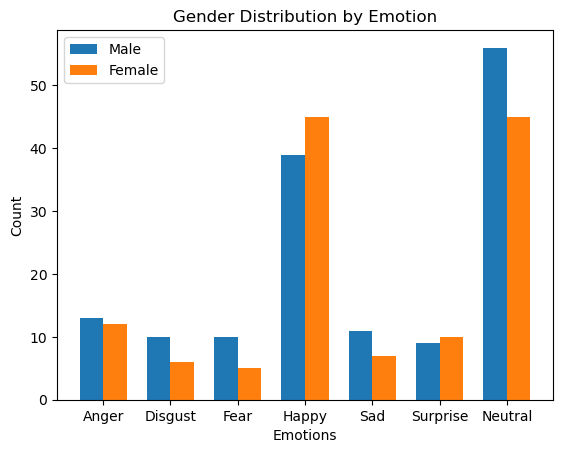

In [16]:
emotions = list(genderDistribution.keys())
male_counts = [genderDistribution[emotion]['M'] for emotion in emotions]
female_counts = [genderDistribution[emotion]['F'] for emotion in emotions]

# Bar chart
bar_width = 0.35
index = range(len(emotions))

plt.bar(index, male_counts, bar_width, label='Male')
plt.bar([i + bar_width for i in index], female_counts, bar_width, label='Female')

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Gender Distribution by Emotion')
plt.xticks([i + bar_width / 2 for i in index], emotions)
plt.legend()

plt.show()

In [17]:
#Get the duration of the videos from datafolder path
def getVideoDuration(dataset):
    videoDuration = {}
    for emotion in dataset.keys():
        fileDuration = {}
        for file in dataset[emotion]:
            if file.endswith('.mp4'):
                cap = cv2.VideoCapture(datafolder+emotion+'/'+file)
                fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
                frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                duration = frame_count/fps
                fileDuration[file] = duration
        videoDuration[emotion] = fileDuration
    return videoDuration

In [18]:
#create box plot for video duration for each emotion
videoDuration = getVideoDuration(dataset)
videoDuration


[ WARN:0@339.912] global cap_ffmpeg_impl.hpp:453 _opencv_ffmpeg_interrupt_callback Stream timeout triggered after 339151.271751 ms


KeyboardInterrupt: 

In [ ]:
emotions = list(videoDuration.keys())
emotion_scores = [list(videoDuration[emotion].values()) for emotion in emotions]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(emotion_scores, labels=emotions)
plt.title('video duration Distribution')
plt.xlabel('Emotion')
plt.ylabel('Emotion duration')
plt.show()

In [19]:
#get one frame from each video and store each frame in a dictionary
def getOneFrame(dataset):
    oneFrame = {}
    for emotion in dataset.keys():
        frames = {}
        for file in dataset[emotion]:
            if file.endswith('.mp4'):
                cap = cv2.VideoCapture(datafolder+emotion+'/'+file)
                ret, frame = cap.read()
                frames[file] = frame
        oneFrame[emotion] = frames
    return oneFrame


In [20]:
oneFrame = getOneFrame(dataset)
oneFrame

{'Anger': {'UpFG5ZK62XM_4_1_68628.mp4': array([[[137, 117, 124],
          [132, 112, 119],
          [141, 123, 132],
          ...,
          [124, 125, 123],
          [125, 131, 127],
          [115, 120, 117]],
  
         [[131, 111, 118],
          [148, 129, 136],
          [133, 115, 124],
          ...,
          [115, 116, 113],
          [115, 120, 117],
          [127, 133, 130]],
  
         [[127, 126, 131],
          [116, 115, 119],
          [ 22,  22,  27],
          ...,
          [ 56, 124, 129],
          [ 61, 132, 137],
          [108, 179, 183]],
  
         ...,
  
         [[124, 129, 120],
          [125, 130, 122],
          [196, 201, 193],
          ...,
          [ 81, 101, 110],
          [ 73,  93, 102],
          [ 75,  95, 104]],
  
         [[122, 126, 118],
          [123, 127, 119],
          [195, 200, 192],
          ...,
          [ 88, 111, 125],
          [ 88, 111, 125],
          [ 91, 115, 129]],
  
         [[122, 126, 118],
          [12

In [21]:
#save the first frame in folder
def saveFirstFrame(oneFrame):
    for emotion in oneFrame.keys():
        for file in oneFrame[emotion].keys():
            cv2.imwrite('./FirstFrame/'+emotion+'/'+file+'.jpg',oneFrame[emotion][file])

In [24]:
saveFirstFrame(oneFrame)

# Process the data

In [30]:
# Read all the file names inside a list of folder and save it in the same array
def read_files(folder):
    files = []
    for file in os.listdir(folder):
        if os.path.isfile(os.path.join(folder, file)) and file.endswith('.jpg'):
            files.append(file)
    return files

In [31]:
# Read all the files in the folder
files = []
emotion_files = {}
for emotion in range(7):
    files.extend(read_files("./EiLA_data/" + str(emotion)))
    emotion_files[emotion] = read_files("./EiLA_data/" + str(emotion))
    

In [32]:
len(files)

5663

In [33]:
emotion_files

{0: ['ngITkMvWuq8_3_6_21067_21097.jpg',
  'Ul53TVUR4NM_2_6_4933_4957.jpg',
  'Ul53TVUR4NM_8_3_34715_34721.jpg',
  'ngITkMvWuq8_2_1_20173_20269.jpg',
  'Ul53TVUR4NM_10_0_63715_63745.jpg',
  'Uh00UIl7-bo_1_8_16249_16291.jpg',
  'Uh00UIl7-bo_1_0_8953_8989.jpg',
  'Uh00UIl7-bo_1_8_16249_16285.jpg',
  'Uh00UIl7-bo_1_2_12151_12223.jpg',
  'Ul53TVUR4NM_6_0_19824_19836.jpg',
  'Ul53TVUR4NM_3_1_11677_11725.jpg',
  'Ul53TVUR4NM_8_5_34757_34781.jpg',
  'Uh00UIl7-bo_1_12_14677_14701.jpg',
  'Ul53TVUR4NM_3_1_11677_11731.jpg',
  'Ul53TVUR4NM_3_1_11677_11719.jpg',
  'uLpLviZ4Hc4_2_1_6385_6391.jpg',
  'Uh00UIl7-bo_1_4_7795_7813.jpg',
  'Ul53TVUR4NM_7_9_24509_24575.jpg',
  'Uh00UIl7-bo_1_4_7795_7807.jpg',
  'Zwf-fZdgtYA_1_5_4327_4369.jpg',
  'Uh00UIl7-bo_1_2_11683_11785.jpg',
  'uLpLviZ4Hc4_2_1_6385_6385.jpg',
  'Ul53TVUR4NM_2_1_4831_4987.jpg',
  'Uh00UIl7-bo_1_2_8077_8245 2.jpg',
  'Ul53TVUR4NM_2_1_4831_4993.jpg',
  'Uh00UIl7-bo_1_0_9895_9931.jpg',
  'Uh00UIl7-bo_1_0_9895_9919.jpg',
  'Uh00UIl7-bo_1_9

In [34]:
class7_names = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger']

In [35]:
#change the index of the emotion files
emotion_files = {class7_names[i]: emotion_files[i] for i in range(7)}

In [36]:
def parse_filename(file):
    # Split the file name from its extension
    filename, ext = os.path.splitext(file)

    # Split the filename by underscores to extract parts
    parts = filename.split('_')

    if len(parts) >= 4:
        # Handle cases where the first part contains underscores
        name = '_'.join(parts[:-4])
        clip_id = parts[-4]
        person_id = parts[-3]
        frame_id = parts[-2]
        frame_video_num = parts[-1]

        return name, clip_id, person_id, frame_id
    else:
        raise ValueError("Filename format is not as expected")

In [37]:
genderDistribution={}
for emotion in emotion_files.keys():
    m = 0
    f = 0
    for file in emotion_files[emotion]:
        try:
            video_name, clip_id, person_id, frame_id = parse_filename(file)

            # Filter demographicsData for matching video_name, clip_id, and person_id
            match = demographicsData[
                (demographicsData['video_tag'] == video_name) &
                (demographicsData['clip_id'] == int(clip_id)) &
                (demographicsData['person_id'] == int(person_id))
                ]

            if not match.empty:
                gender = match['gender'].values[0]
                if gender == 'M':
                    m += 1
                elif gender == 'F':
                    f += 1
        except ValueError as e:
            print(f"Error parsing file {file}: {e}")

    genderCount = {'M': m, 'F': f}
    genderDistribution[emotion] = genderCount

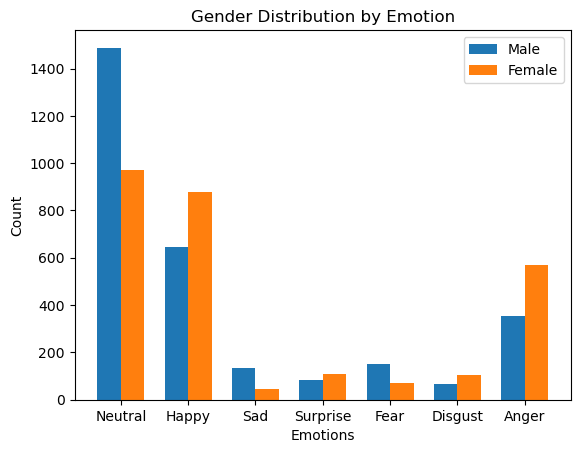

In [38]:
emotions = list(genderDistribution.keys())
male_counts = [genderDistribution[emotion]['M'] for emotion in emotions]
female_counts = [genderDistribution[emotion]['F'] for emotion in emotions]

# Bar chart
bar_width = 0.35
index = range(len(emotions))

plt.bar(index, male_counts, bar_width, label='Male')
plt.bar([i + bar_width for i in index], female_counts, bar_width, label='Female')

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Gender Distribution by Emotion')
plt.xticks([i + bar_width / 2 for i in index], emotions)
plt.legend()
#save 
plt.savefig("Processed_gender_distribution.png")
plt.show()

## Race

In [39]:
RaceDistribution={}
for emotion in emotion_files.keys():
    m = 0
    w = 0
    b = 0
    for file in emotion_files[emotion]:
        try:
            video_name, clip_id, person_id, frame_id = parse_filename(file)

            # Filter demographicsData for matching video_name, clip_id, and person_id
            match = demographicsData[
                (demographicsData['video_tag'] == video_name) &
                (demographicsData['clip_id'] == int(clip_id)) &
                (demographicsData['person_id'] == int(person_id))
                ]

            if not match.empty:
                race = match['race'].values[0]
                if race == 'W':
                    w += 1
                elif race == 'M':
                    m += 1
                elif race == 'B':
                    b += 1
        except ValueError as e:
            print(f"Error parsing file {file}: {e}")

    raceCount = {'W': w, 'M': m, 'B': b}
    RaceDistribution[emotion] = raceCount

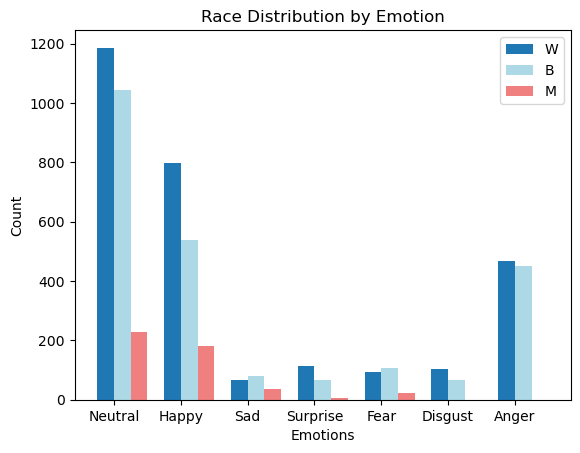

In [40]:
emotions = list(RaceDistribution.keys())
w_count = [RaceDistribution[emotion]['W'] for emotion in emotions]
m_count = [RaceDistribution[emotion]['M'] for emotion in emotions]
b_count = [RaceDistribution[emotion]['B'] for emotion in emotions]

# Bar chart
bar_width = 0.25
index = range(len(emotions))

plt.bar(index, w_count, bar_width, label='W')
plt.bar([i + bar_width for i in index], b_count, bar_width, label='B', color= 'lightblue')
plt.bar([i + bar_width*2 for i in index], m_count, bar_width, label='M', color= 'lightcoral')


plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Race Distribution by Emotion')
plt.xticks([i + bar_width / 2 for i in index], emotions)
plt.legend()
#save 
plt.savefig("race_distribution_processed.png")
plt.show()

## emotion distribution

In [41]:
# plot the distribution of emotions
emotionCount = {}
for emotion in emotion_files.keys():
    emotionCount[emotion] = len(emotion_files[emotion])
    
emotionCount


{'Neutral': 2459,
 'Happy': 1520,
 'Sad': 182,
 'Surprise': 189,
 'Fear': 223,
 'Disgust': 170,
 'Anger': 920}

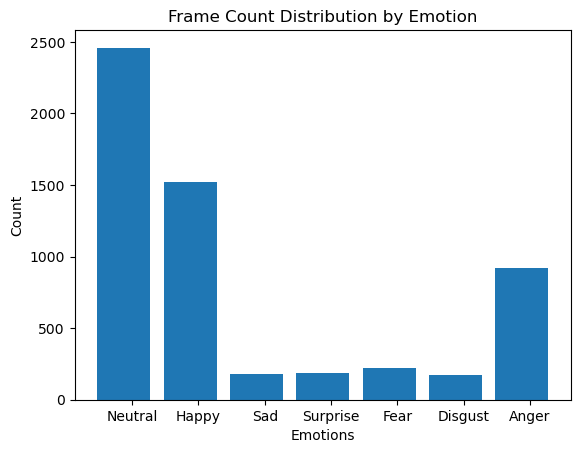

In [42]:
bar_width = 0.25
index = range(len(emotions))

plt.bar(index, emotionCount.values())

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Frame Count Distribution by Emotion')
plt.xticks([i + bar_width / 2 for i in index], emotions)
# plt.legend()
#save
plt.savefig("frame_count_distribution_processed.png")
plt.show()